In [1]:
import warnings
warnings.filterwarnings("ignore")
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
warnings.filterwarnings("ignore")
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()
warnings.filterwarnings("ignore")


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dro

In [28]:
#def plt_dynamic(x, vy, ty, fig, ax, colors=['b']):
    
def plotCurve(model,history):
    # list of epoch numbers
    x = list(range(1,epochs+1))
    vy = history.history['val_loss']
    ty = history.history['loss']
    #plt_dynamic(x, vy, ty, fig, ax)
    fig,ax = plt.subplots(1,1)
    ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [11]:
def fitCalculate(model):
    history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    return history

Test loss: 0.03665054132399339
Test accuracy: 0.993


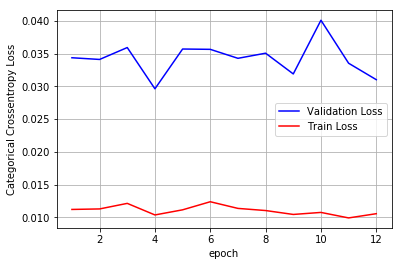

In [30]:
history = fitCalculate(model)
plotCurve(model,history)

note for me: 

conv2d_1 outshape = 28 - 3 +1 = 26

conv2d_2 outshape = 26 - 3 +1 = 24

max_pooling2d_1 outshape = ((24 - 2(max pool) + 2 * 0(padding)) / 2(stride)) + 1 = 12

flatten_1 outshape = 12 \* 12 \* 64 = 9216

number of parameters in conv2d_1 = (shape of width of the filter) \* shape of height of the filter \* number of feature maps +1) \* number of filters = (3 \* 3 \* 1 + 1) \* 32 = 320

number of parameters in conv2d_2 = (3 \* 3 \* 32 + 1) \* 64 = 18496

*more details <a href="https://stackoverflow.com/questions/42786717/how-to-calculate-the-number-of-parameters-for-convolutional-neural-network">here</a>*

## Model 2

In [31]:
warnings.filterwarnings("ignore")
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])
model2.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               819328    
_________________________________________________________________
dro

Test loss: 0.025976000575942362
Test accuracy: 0.9926


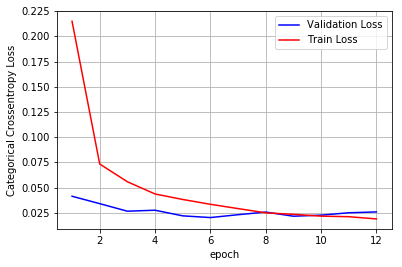

In [32]:
history_2 = fitCalculate(model2)
plotCurve(model2,history_2)

## Model 3

In [35]:
warnings.filterwarnings("ignore")
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model3.add(Conv2D(64, (5, 5), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

model3.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 22, 22, 32)        1600      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               663680    
_________________________________________________________________
dro

Test loss: 0.022470235473414004
Test accuracy: 0.9937


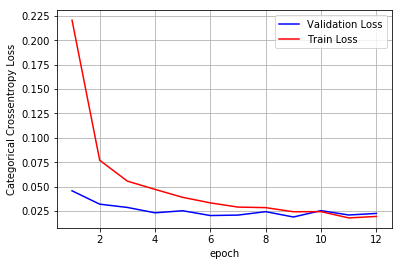

In [36]:
history_3 = fitCalculate(model3)
plotCurve(model3,history_3)

## Model 4

In [66]:
warnings.filterwarnings("ignore")
batch_size = 128
num_classes = 10
epochs = 12
from keras.initializers import glorot_uniform
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape)) #outshape 28-5+1 = 24
model4.add(MaxPooling2D(pool_size=(2, 2))) #outshape ((24-2)/2)+1 = 12
model4.add(Dropout(0.25))
model4.add(Conv2D(16, (5, 5), activation='relu')) #outshape 12-5 + 1 = 8
model4.add(MaxPooling2D(pool_size=(2, 2))) #outshape ((8-2)/2)+1 = 4
model4.add(Dropout(0.25))
model4.add(Conv2D(16, (3, 3), activation='relu'))#outshape 4-3+1 = 2
model4.add(MaxPooling2D(pool_size=(1, 1)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(50, activation='relu',kernel_initializer=glorot_uniform()))
#model4.add(Dropout(0.2))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="adam",
              metrics=['accuracy'])

model4.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 8, 16)          12816     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 4, 4, 16)          0         
_________________________________________________________________
con

Test loss: 0.018983773088160523
Test accuracy: 0.9944


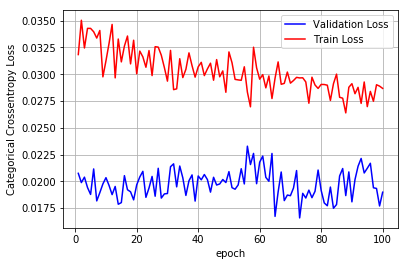

In [70]:
epochs = 100
history_4 = fitCalculate(model4)
plotCurve(model4,history_4)

# Conclusion

In [71]:
from prettytable import PrettyTable

pt = PrettyTable()
pt.field_names = ["Model","Number Of Trainable Params", "Test Score", "Test Accuracy"]

pt.add_row(["Model 1", "1,199,882" , 0.0366, 0.993])
pt.add_row(["Model 2", "872,714" , 0.0259, 0.9926])
pt.add_row(["Model 3", "717,834" , 0.0225, 0.9937])
pt.add_row(["Model 4", "19,728" , 0.0189, 0.9944])
print(pt)

+---------+----------------------------+------------+---------------+
|  Model  | Number Of Trainable Params | Test Score | Test Accuracy |
+---------+----------------------------+------------+---------------+
| Model 1 |         1,199,882          |   0.0366   |     0.993     |
| Model 2 |          872,714           |   0.0259   |     0.9926    |
| Model 3 |          717,834           |   0.0225   |     0.9937    |
| Model 4 |           19,728           |  0.02646   |     0.992     |
+---------+----------------------------+------------+---------------+


1) Model 1 is *overfitted*, can be said after looking at the plot of train loss vs validation loss curve.

2) Model 2 and Model 3 is *neither* overfitted *nor* underfitted, can be said after looking at the plot of train loss vs validation loss curve.

3) The number of parameters in model 4 is very less than that of model 1 to model 3, still test acore and test accuracy are better.

4) It is very important to understand how to calculate outshape of each layer and number of parameters for desigining a model architecture.